In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



In [2]:
# Load in the dataset
diabetes_df = pd.read_csv("C:/Users/aryan/Downloads/diabetes.csv")
diabetes_df 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 3. Understand the data
print(diabetes_df.head())
print(diabetes_df.info())
print(diabetes_df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [4]:
# Step 4: Drop rows with invalid zero values in important columns
df_clean = diabetes_df.copy()
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for col in cols_with_zero_invalid:
    df_clean = df_clean[df_clean[col] != 0]

In [5]:
# Step 5: Standardize the features (excluding the target)
X_raw = df_clean.drop(columns=['BloodPressure'])
y = df_clean['BloodPressure']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

In [6]:
# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# 7. Train a Multivariate Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [8]:
# 8. Predict on test set
y_pred = lr_model.predict(X_test)


In [9]:
# 9. Evaluate model
print("Linear Regression Results:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

Linear Regression Results:
R² Score: -0.0061
RMSE: 11.44


In [10]:
# 10. 10-fold Cross-Validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_model, X_scaled, y, cv=cv, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Average CV R² Score: {cv_scores.mean():.4f}")

Cross-Validation R² Scores: [-0.12397917  0.27715041  0.12369232  0.20565828  0.20350997  0.34306356
 -0.11029475  0.08334009  0.05331035  0.12151693]
Average CV R² Score: 0.1177


In [11]:
# 11. Lasso Regression (for feature selection)
lasso = LassoCV(cv=10, random_state=42)
lasso.fit(X_train, y_train)

print("Lasso Coefficients:")
for col, coef in zip(X_raw.columns, lasso.coef_):
    print(f"{col}: {coef:.4f}")



Lasso Coefficients:
Pregnancies: 0.2668
Glucose: 0.4723
SkinThickness: -0.0000
Insulin: -0.7286
BMI: 3.8995
DiabetesPedigreeFunction: -1.2788
Age: 2.9883
Outcome: 0.4280


In [12]:
# 12. PRESS (Prediction Residual Error Sum of Squares) calculation
def calculate_press(model, X, y):
    y_hat = model.predict(X)
    residuals = y - y_hat
    hat_matrix_diag = np.sum((X - X.mean())**2, axis=0) / np.sum((X - X.mean())**2)
    press = np.sum((residuals / (1 - hat_matrix_diag))**2)
    return press

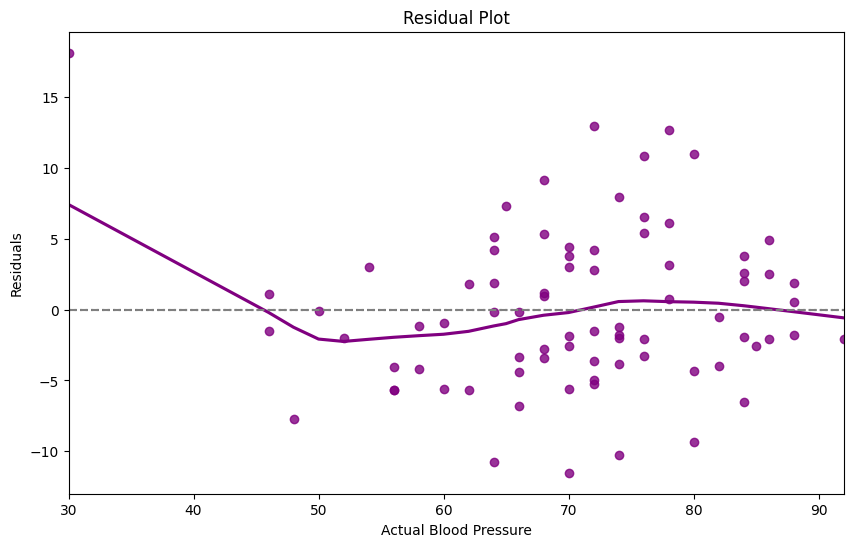

In [13]:
# 13. Visualization 
plt.figure(figsize=(10,6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='purple')
plt.xlabel("Actual Blood Pressure")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, linestyle='--', color='grey')
plt.show()